<a href="https://colab.research.google.com/github/ashwinbjind/Street-View-House-Numbers-SVHN-/blob/main/SVHN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <font color='GREEN'>  **CNN to detect house numbers using the standard SVHN dataset**</font>

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 ### **Import necessory libraries.** 




In [ ]:

import tensorflow 
import keras
import itertools
import numpy             as np
import scipy.io          as sio
import matplotlib.pyplot as plt

from sklearn.model_selection              import train_test_split
from sklearn.metrics                      import confusion_matrix
from tensorflow.keras.models              import Sequential
from tensorflow.keras.layers              import Dense, Activation,GlobalAveragePooling2D, Dropout,MaxPool2D, Flatten,Conv2D, MaxPooling2D,BatchNormalization,Input,Lambda  #,LayerNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models              import Sequential,Model
from tensorflow.keras.optimizers          import Adam
from keras.preprocessing.image            import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing       import 
from tensorflow.keras.models              import Model
from tensorflow.keras                     import backend as k 
%matplotlib inline







fr



SyntaxError: ignored

### **Loading dataset**

In [ ]:
train_data=sio.loadmat('/content/drive/MyDrive/SVHN/train_mat/train.mat')
test_data=sio.loadmat('/content/drive/MyDrive/SVHN/test_mat/test.mat')
                      

In [ ]:
# Data type.
print(type(train_data))
print(type(test_data))

<class 'dict'>
<class 'dict'>


In [ ]:
# checking the shape of data
X_train_org = train_data['X']
X_test_org = test_data['X']

print('X_train_original:',X_train_org.shape)
print('X_test_original: ',X_test_org.shape)


X_train_original: (32, 32, 3, 73257)
X_test_original:  (32, 32, 3, 26032)


In [ ]:
## Move axes of an array to new positions. Other axes remain in their original order. For train test split
X_train = np.moveaxis(X_train_org, -1, 0)
X_test = np.moveaxis(X_test_org, -1, 0)

print(X_train.shape)
print(X_test.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


In [ ]:
y_train = train_data['y']
y_test = test_data['y']
print('y_train:',y_train.shape)

print('y_test: ',y_test.shape)

y_train: (73257, 1)
y_test:  (26032, 1)


Label: [4]


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

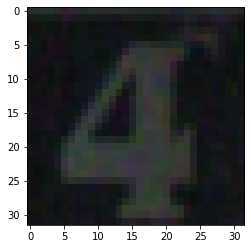

In [ ]:
## Checking the image.

plt.imshow(X_train_org[:, :, :, 302])
print('Label: {0}'.format(y_train[302]))
plt

In [ ]:
## train test split with 80:20 share.
P_train, P_test, Q_train, Q_test = train_test_split(X_train, y_train,test_size=0.2, random_state=0)

In [ ]:
#checking shape of test dataset.
print(P_train.shape)
print(Q_test.shape)

(58605, 32, 32, 3)
(14652, 1)


In [ ]:
# Image augmentation is a technique to transform data in multiple transformed copies of the same image.
datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)      #rescale = 1./255

# <font color='GREEN'>  **CNN**</font>

In [ ]:

# model = keras.Sequential([
# # Step 1:Convolution.
# keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',input_shape=(32, 32, 3)),


# #Step 2:Maxpooling.
# keras.layers.MaxPooling2D((2, 2)),
# keras.layers.Dropout(0.3),

# ##Step 3:Adding a second Convolution Layer.
# keras.layers.Conv2D(64,(3, 3), padding='same', 
#                            activation='relu'),
# keras.layers.BatchNormalization(),
# keras.layers.Conv2D(64, (3, 3), padding='same',activation='relu'),

# #Step 4:Maxpooling.
# keras.layers.MaxPooling2D((2, 2)),
# keras.layers.Dropout(0.3),

# #Step 5:Flattening.
# keras.layers.Flatten(),

# #Step 6:Fully Connection Output Layer.
# keras.layers.Dense(128, activation='relu'),
# keras.layers.Dropout(0.4),    
# keras.layers.Dense(10, activation='softmax')

#])
# optimizer = tensorflow.keras.optimizers.Adam(learning_rate=1e-3)

# model.compile(optimizer=optimizer,
#               loss='categorical_crossentropy',    
#               metrics=['accuracy'])

In [ ]:


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)         

In [ ]:
history = model.fit_generator(datagen.flow(P_train, Q_train, batch_size=1024),
                              epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
58/58 [==============================] - 64s 1s/step - loss: 6582151.0000 - accuracy: 0.0051
Epoch 2/10
58/58 [==============================] - 60s 1s/step - loss: 593348224.0000 - accuracy: 0.0032
Epoch 3/10
58/58 [==============================] - 59s 1s/step - loss: 8021498368.0000 - accuracy: 0.0029
Epoch 4/10
58/58 [==============================] - 59s 1s/step - loss: 46561648640.0000 - accuracy: 0.0039
Epoch 5/10
58/58 [==============================] - 60s 1s/step - loss: 162315091968.0000 - accuracy: 0.0038
Epoch 6/10
58/58 [==============================] - 60s 1s/step - loss: 428152291328.0000 - accuracy: 0.0036
Epoch 7/10
58/58 [==============================] - 60s 1s/step - loss: 931868639232.0000 - accuracy: 0.0035
Epoch 8/10
58/58 [==============================] - 60s 1s/step - loss: 1798206521344.0000 - accuracy: 0.0039
Epoch 9/10
58/58 [==============================] - 59s 1s/step - loss: 3146258055168.0000 - accuracy: 0.0040
Epoch 10/10
58/58 [=========

In [ ]:
train_accuracy = history.history['accuracy']
test_accuracy = history.history['accuracy']

train_error = history.history['loss']
test_error = history.history['loss']

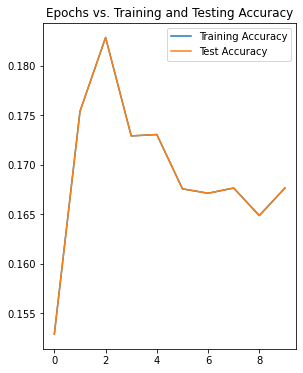

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Testing Accuracy')
    
# plt.subplot(1, 2, 2)
# plt.plot(train_error, label='Training Loss')
# plt.plot(test_error, label='Testing Loss')
# plt.legend()
# plt.title('Epochs vs. Training and testing Loss')

plt.show()